<a href="https://colab.research.google.com/github/DilaraSaruhan/Data-Mining/blob/main/MuffinOrCupcakeDilaraSaruhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Veri Madenciliği Uygulamaları Dersi - BIL542**

---


**Dilara Saruhan** ⭐

---






**Problem**

Muffin ve Cupcake tarifleri için;

Bunları derleyip bir veri kümesi oluşturunuz. (en az 5 er muffin, ve cubcake)


Veri Kümesindeki Bilgileri için ÖNİŞLEME yapınız
(Temizleyiniz)


Veri Kümesindeki alanları hakkında istatistiksel bilgiler toplayınız Ort, Std Sapma, Min, Max.


Uygun araçlar bularak BoxPlot Çıkarınız (Knime, phyton, R vs olabilir.)


K-NN metotu  (k=1) kullanarak Sınıflandırmamızın ne kadar başarılı olacağını (kağıt kalem, EXCEL, ARAÇ, phyton, R , Knime, Weka vb kullanılabilir)


Confusion MATRİX çıkarınız. Accuracy, Precision, Sensitivity Selectivity çıkarnız.


Confusion Matrix çıkarabilmek için Her seferinde bir girdiyi TEST olarak gerçekleştiriniz.


---



Statistics:
           Flour     Sugar       Milk     Butter        Egg  BakingPowder  \
count  10.000000  10.00000  10.000000  10.000000  10.000000     10.000000   
mean   47.000000  11.80000  21.400000  10.100000   4.900000      1.600000   
std     4.472136   2.65832   3.204164   2.601282   1.100505      0.516398   
min    39.000000   8.00000  16.000000   5.000000   3.000000      1.000000   
25%    44.250000  10.00000  19.250000   9.000000   4.250000      1.000000   
50%    46.500000  11.50000  21.500000  10.000000   5.000000      2.000000   
75%    50.750000  13.75000  23.750000  11.750000   5.000000      2.000000   
max    53.000000  16.00000  26.000000  14.000000   7.000000      2.000000   

         Vanilla  
count  10.000000  
mean    1.600000  
std     0.516398  
min     1.000000  
25%     1.000000  
50%     2.000000  
75%     2.000000  
max     2.000000  


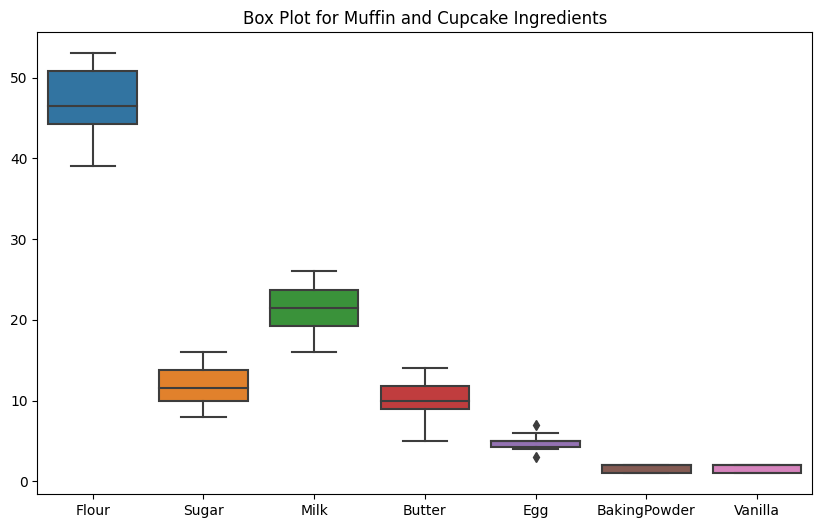


Confusion Matrix:
[[1 0]
 [0 1]]

Accuracy: 1.0
Precision for Muffin: 1.0
Precision for Cupcake: 1.0
Sensitivity (Recall) for Muffin: 1.0
Sensitivity (Recall) for Cupcake: 1.0
Specificity: 1.0
Selectivity: 1.0


In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Muffin ve Cupcake tariflerini içeren bir veri kümesi oluşturdum
data = {
    'Type': ['Muffin', 'Muffin', 'Cupcake', 'Cupcake', 'Muffin', 'Cupcake', 'Muffin', 'Cupcake', 'Cupcake', 'Muffin'],
    'Flour': [45, 47, 50, 39, 52, 46, 51, 43, 44, 53],
    'Sugar': [10, 12, 8, 15, 11, 14, 9, 16, 13, 10],
    'Milk': [20, 22, 18, 25, 21, 24, 16, 26, 23, 19],
    'Butter': [10, 5, 8, 9, 11, 14, 9, 12, 13, 10],
    'Egg': [5, 7, 5, 3, 5, 6, 5, 4, 4, 5],
    'BakingPowder': [2, 2, 1, 2, 2, 1, 1, 2, 2, 1],
    'Vanilla': [2, 2, 1, 2, 2, 1, 1, 2, 2, 1],
}

df = pd.DataFrame(data)

# Veri kümesindeki alanları hakkında istatistiksel bilgileri topladım
statistics = df.describe()
print("Statistics:")
print(statistics)

# Veri kümesini temizledim
df = df.dropna()

# BoxPlot çıkardım (tüm özellikleri kullandım)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop('Type', axis=1))
plt.title('Box Plot for Muffin and Cupcake Ingredients')
plt.show()

# Veri setini özellikler ve etiketler olarak ayırdım
X = df.drop('Type', axis=1)
y = df['Type']

# Veri setini eğitim ve test setlerine ayırdım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-NN (k=1) sınıflandırıcıyı kullanarak modeli eğittim
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Test seti üzerinde tahmin yaptım
y_pred = knn.predict(X_test)

# Confusion Matrix'i oluşturdum
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Accuracy, Precision, Sensitivity, Specificity ve Selectivity'yi hesapladım
accuracy = metrics.accuracy_score(y_test, y_pred)
precision_muffin = metrics.precision_score(y_test, y_pred, pos_label='Muffin')
precision_cupcake = metrics.precision_score(y_test, y_pred, pos_label='Cupcake')
sensitivity_muffin = metrics.recall_score(y_test, y_pred, pos_label='Muffin')
sensitivity_cupcake = metrics.recall_score(y_test, y_pred, pos_label='Cupcake')
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # TN / (TN + FP)
selectivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])  # TN / (FP + TN)

# Sonuçları yazdırdım
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision for Muffin:", precision_muffin)
print("Precision for Cupcake:", precision_cupcake)
print("Sensitivity (Recall) for Muffin:", sensitivity_muffin)
print("Sensitivity (Recall) for Cupcake:", sensitivity_cupcake)
print("Specificity:", specificity)
print("Selectivity:", selectivity)
